In [253]:
import numpy as np
import pandas as pd
from IPython.display import display

import seaborn as sns

def num2interval(ref, prod, q=10):
    
    ref_col, qt = pd.qcut(ref, q=q, retbins=True)
    
    #fix quantile intervals
    qt[0] = -np.inf
    qt[-1] = np.inf
    
    prod_col = pd.cut(prod, bins = qt)
    ref_col = pd.cut(ref, bins=qt)
    
    return ref_col, prod_col

def calculate_psi(ref, prod, eps=0, min_count=1):
    """
    (Pa - Pb)*ln(Pa/Pb)
    
    As a rule of thumb we consider:
    PSI < 0.1 — No considerable change.
    PSI >= 0.1 but less than 0.2 — Slight drift.
    PSI >= 0.2 — Significant change in features distribution. Maybe retraining is required.
    
    """
    tab = pd.merge(
        (ref.value_counts() + eps).rename('ref'), 
        (prod.value_counts() + eps).rename('prod'),
        left_index=True, right_index=True, how='outer').fillna(min_count)

    tab['p_ref'] = (tab['ref']/tab['ref'].sum())
    tab['p_prod'] = (tab['prod']/tab['prod'].sum())

    tab['psi'] = (tab['p_ref'] - tab['p_prod'])*np.log(tab['p_ref']/tab['p_prod'])
    tab = tab.sort_values(by='psi', ascending=False)
    
    feat_psi = tab['psi'].sum()
    
    return feat_psi, tab

In [261]:
df = pd.read_csv("data/Data_Science_Fields_Salary_Categorization.csv")

df1 = df[df['Working_Year'] == 2020]
df2 = df[df['Working_Year'] == 2021]

ref = df1['Designation']
prod = df2['Designation']

psi, tab =  calculate_psi(ref, prod)
print(psi)
display(tab)

0.24673027129246278


,ref,prod,p_ref,p_prod,psi
Lead Data Scientist,2.0,1.0,0.021505,0.004566,0.026249
Product Data Analyst,2.0,1.0,0.021505,0.004566,0.026249
Business Data Analyst,2.0,1.0,0.021505,0.004566,0.026249
Research Scientist,2.0,10.0,0.021505,0.045662,0.018189
Data Science Manager,1.0,6.0,0.010753,0.027397,0.015567
Machine Learning Engineer,5.0,18.0,0.053763,0.082192,0.012067
BI Data Analyst,1.0,5.0,0.010753,0.022831,0.009095
Principal Data Scientist,1.0,5.0,0.010753,0.022831,0.009095
Director of Data Science,1.0,5.0,0.010753,0.022831,0.009095
Data Engineer,11.0,32.0,0.118280,0.146119,0.005884


0.03642638958946161


,ref,prod,p_ref,p_prod,psi
"(38540.0, 45030.0]",827,659,0.100012,0.068368,1.203690e-02
"(-inf, 38540.0]",827,683,0.100012,0.070858,1.004691e-02
"(80210.0, inf]",827,1210,0.100012,0.125532,5.799767e-03
"(73870.0, 80210.0]",827,1161,0.100012,0.120448,3.799651e-03
"(64090.0, 69200.0]",830,1129,0.100375,0.117128,2.586029e-03
"(55160.0, 59550.0]",827,846,0.100012,0.087768,1.598888e-03
"(69200.0, 73870.0]",824,1030,0.099649,0.106858,5.034236e-04
"(45030.0, 50250.0]",831,989,0.100496,0.102604,4.376733e-05
"(59550.0, 64090.0]",826,973,0.099891,0.100944,1.104043e-05
"(50250.0, 55160.0]",823,959,0.099528,0.099492,1.354291e-08


C:\Users\rsasa\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rsasa\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='risk_score', ylabel='Density'>

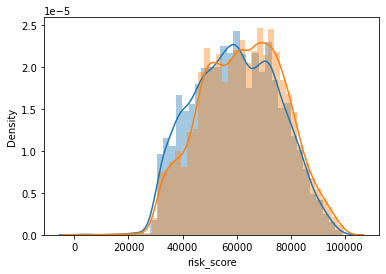

In [259]:
df = pd.read_csv("data/Financial-Data.csv")

df1 = df[df['e_signed'] == 0]
df2 = df[df['e_signed'] == 1]

ref = df1['risk_score']
prod = df2['risk_score']

ref,prod = num2interval(ref, prod)
psi, tab = calculate_psi(ref, prod, eps=0, min_count=1)
print(psi)
display(tab)

sns.distplot(df1['risk_score'])
sns.distplot(df2['risk_score'])

0.0016336540007459025


,ref,prod,p_ref,p_prod,psi
"(61275.0, 65950.0]",903,831,0.100849,0.092808,0.000668
"(56950.0, 61275.0]",891,838,0.099509,0.093589,0.000363
"(52000.0, 56950.0]",894,940,0.099844,0.104981,0.000258
"(-inf, 40000.0]",897,932,0.100179,0.104088,0.000150
"(81000.0, inf]",895,924,0.099955,0.103194,0.000103
"(40000.0, 47100.0]",903,924,0.100849,0.103194,0.000054
"(47100.0, 52000.0]",892,879,0.099620,0.098168,0.000021
"(75050.0, 81000.0]",891,900,0.099509,0.100514,0.000010
"(70500.0, 75050.0]",896,890,0.100067,0.099397,0.000005
"(65950.0, 70500.0]",892,896,0.099620,0.100067,0.000002


C:\Users\rsasa\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rsasa\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='risk_score', ylabel='Density'>

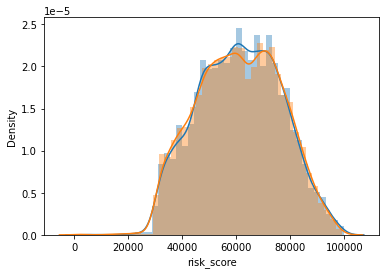

In [260]:
df = pd.read_csv("data/Financial-Data.csv")
df = df.sample(len(df))

len_df = len(df)
df1 = df.iloc[:round(len_df/2),:]
df2 = df.iloc[round(len_df/2): ,:]

ref = df1['risk_score']
prod = df2['risk_score']

ref,prod = num2interval(ref, prod)
psi, tab = calculate_psi(ref, prod, eps=0, min_count=1)
print(psi)
display(tab)

sns.distplot(df1['risk_score'])
sns.distplot(df2['risk_score'])